In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [114]:
df = pd.read_csv('train.csv')

## Описание столбцов датасета Titanic

- **PassengerId** — уникальный идентификатор пассажира.

- **Survived** — факт выживания (0 = нет, 1 = да).

- **Pclass** — класс билета (1 = высший, 2 = средний, 3 = низший).

- **Name** — имя пассажира.

- **Sex** — пол пассажира.

- **Age** — возраст (в годах).

- **SibSp** — количество братьев/сестер и супругов на борту.

- **Parch** — количество родителей и детей на борту.

- **Ticket** — номер билета.

- **Fare** — стоимость проезда.

- **Cabin** — номер каюты (если известен).

- **Embarked** — порт посадки (C = Шербур, Q = Квинстаун, S = Саутгемптон).

In [115]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [117]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Наблюдения:

- Целевой стобец предсказания **Survived**.

- Столбец **Name** с именем пассажира нам не нужен. Возможно есть способ выловить оттуда важную информацию (к примеру по "Mr." или "Mrs." понять что пассажир в браке). Но это слишком долго и сложно. Возможно вернусь к этому, если понадобиться бороться за проценты.

- Столбцы **Ticket** и **Cabin** тоже удалим. Сложно извлечь оттуда что-то полезное.

- В оставшихся столбцах в **Age** и **Embarked** есть пропуски. В последнем всего два пропуска, так что просто удалим две записи. А в **Age** заменим медианой или чем-нибудь другим (построим график и посмотрим что будет лучше)

In [118]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df = df.dropna(subset=['Embarked'])
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

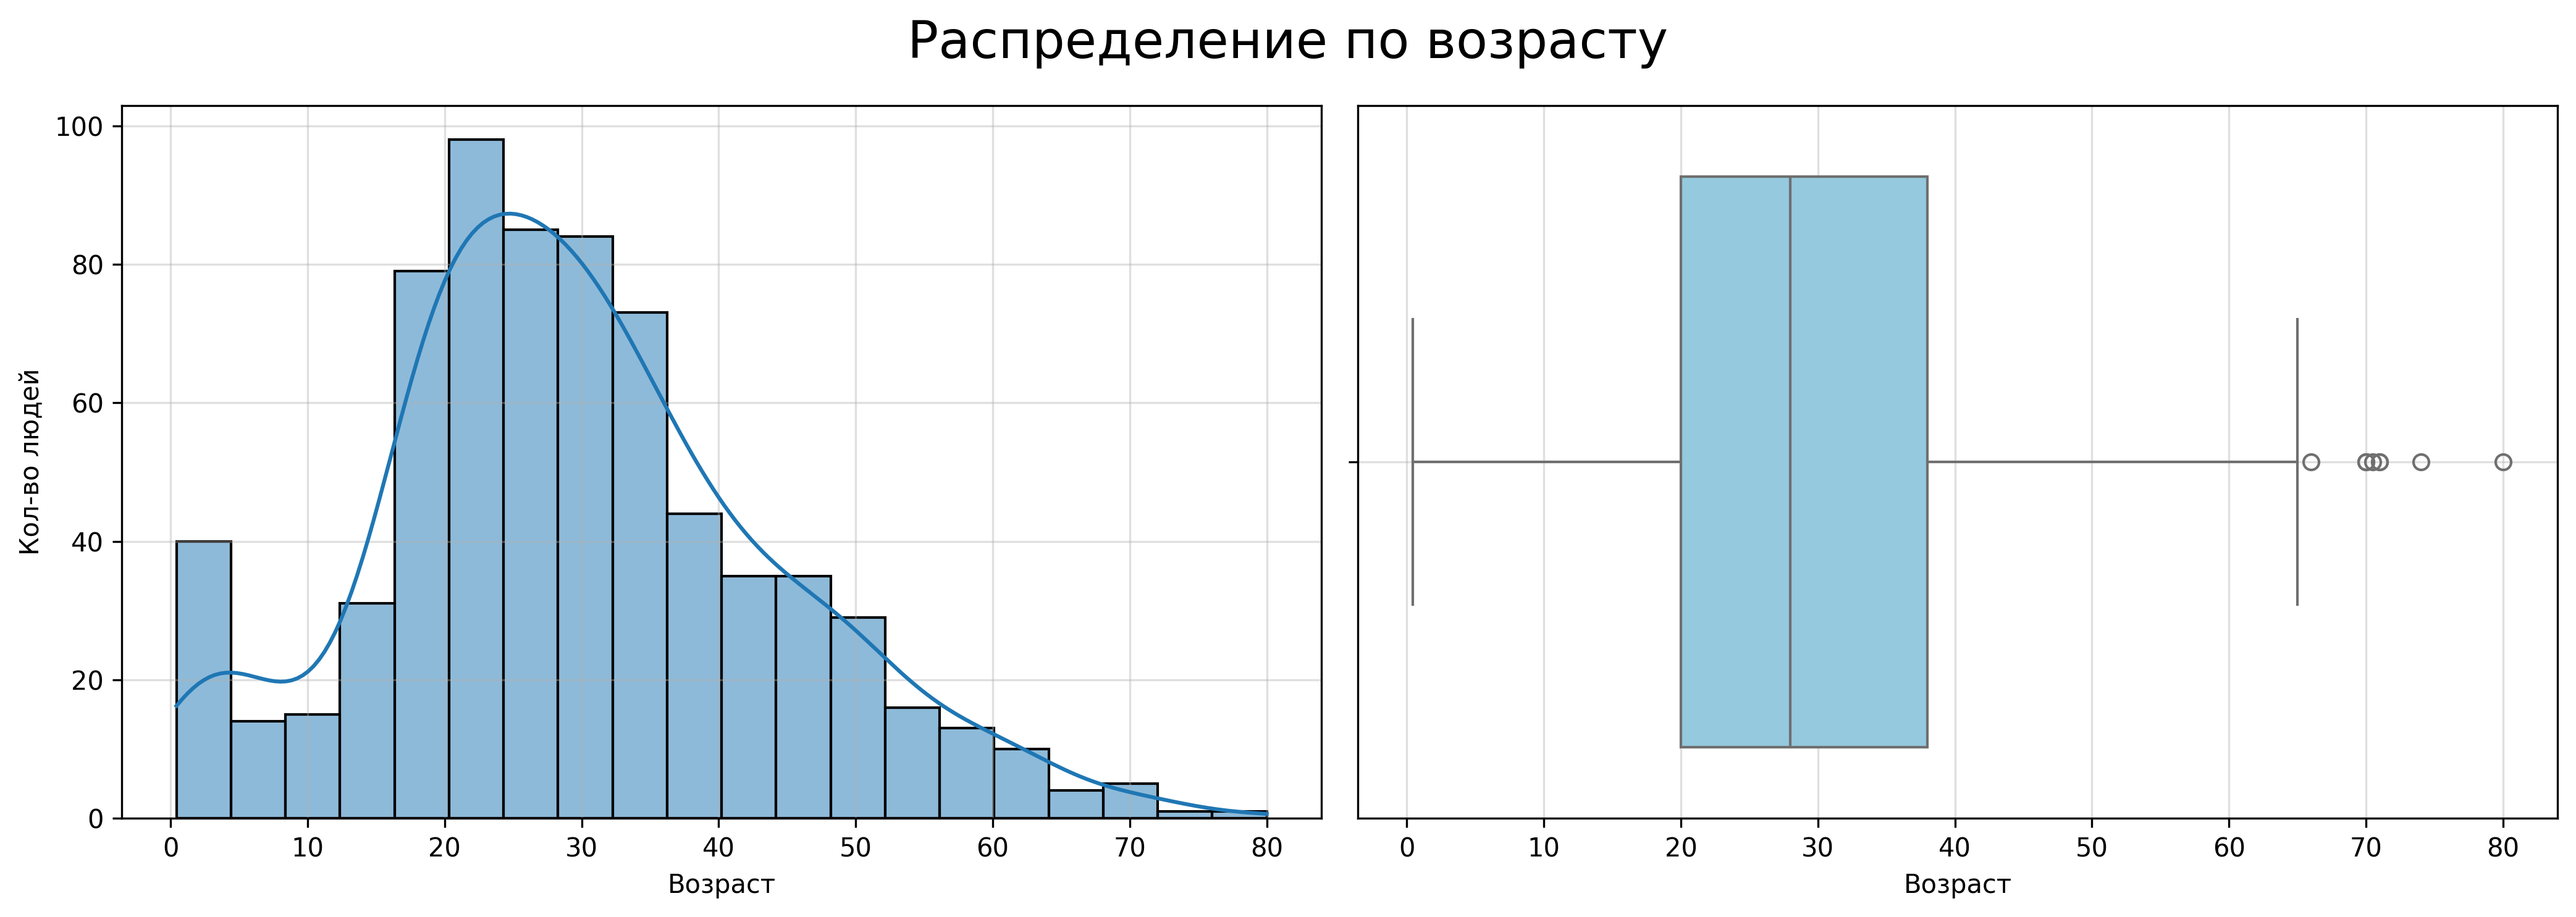

In [119]:
plt.figure(figsize=(14, 5), dpi=300)


plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.grid(True, alpha=0.4)
plt.xlabel('Возраст')
plt.ylabel('Кол-во людей')

plt.subplot(1, 2, 2)
sns.boxplot(df['Age'].dropna(), orient='h', color='skyblue')
plt.grid(True, alpha=0.4)
plt.xlabel('Возраст')

plt.suptitle('Распределение по возрасту', fontsize=20)
plt.tight_layout()
plt.show()

In [120]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

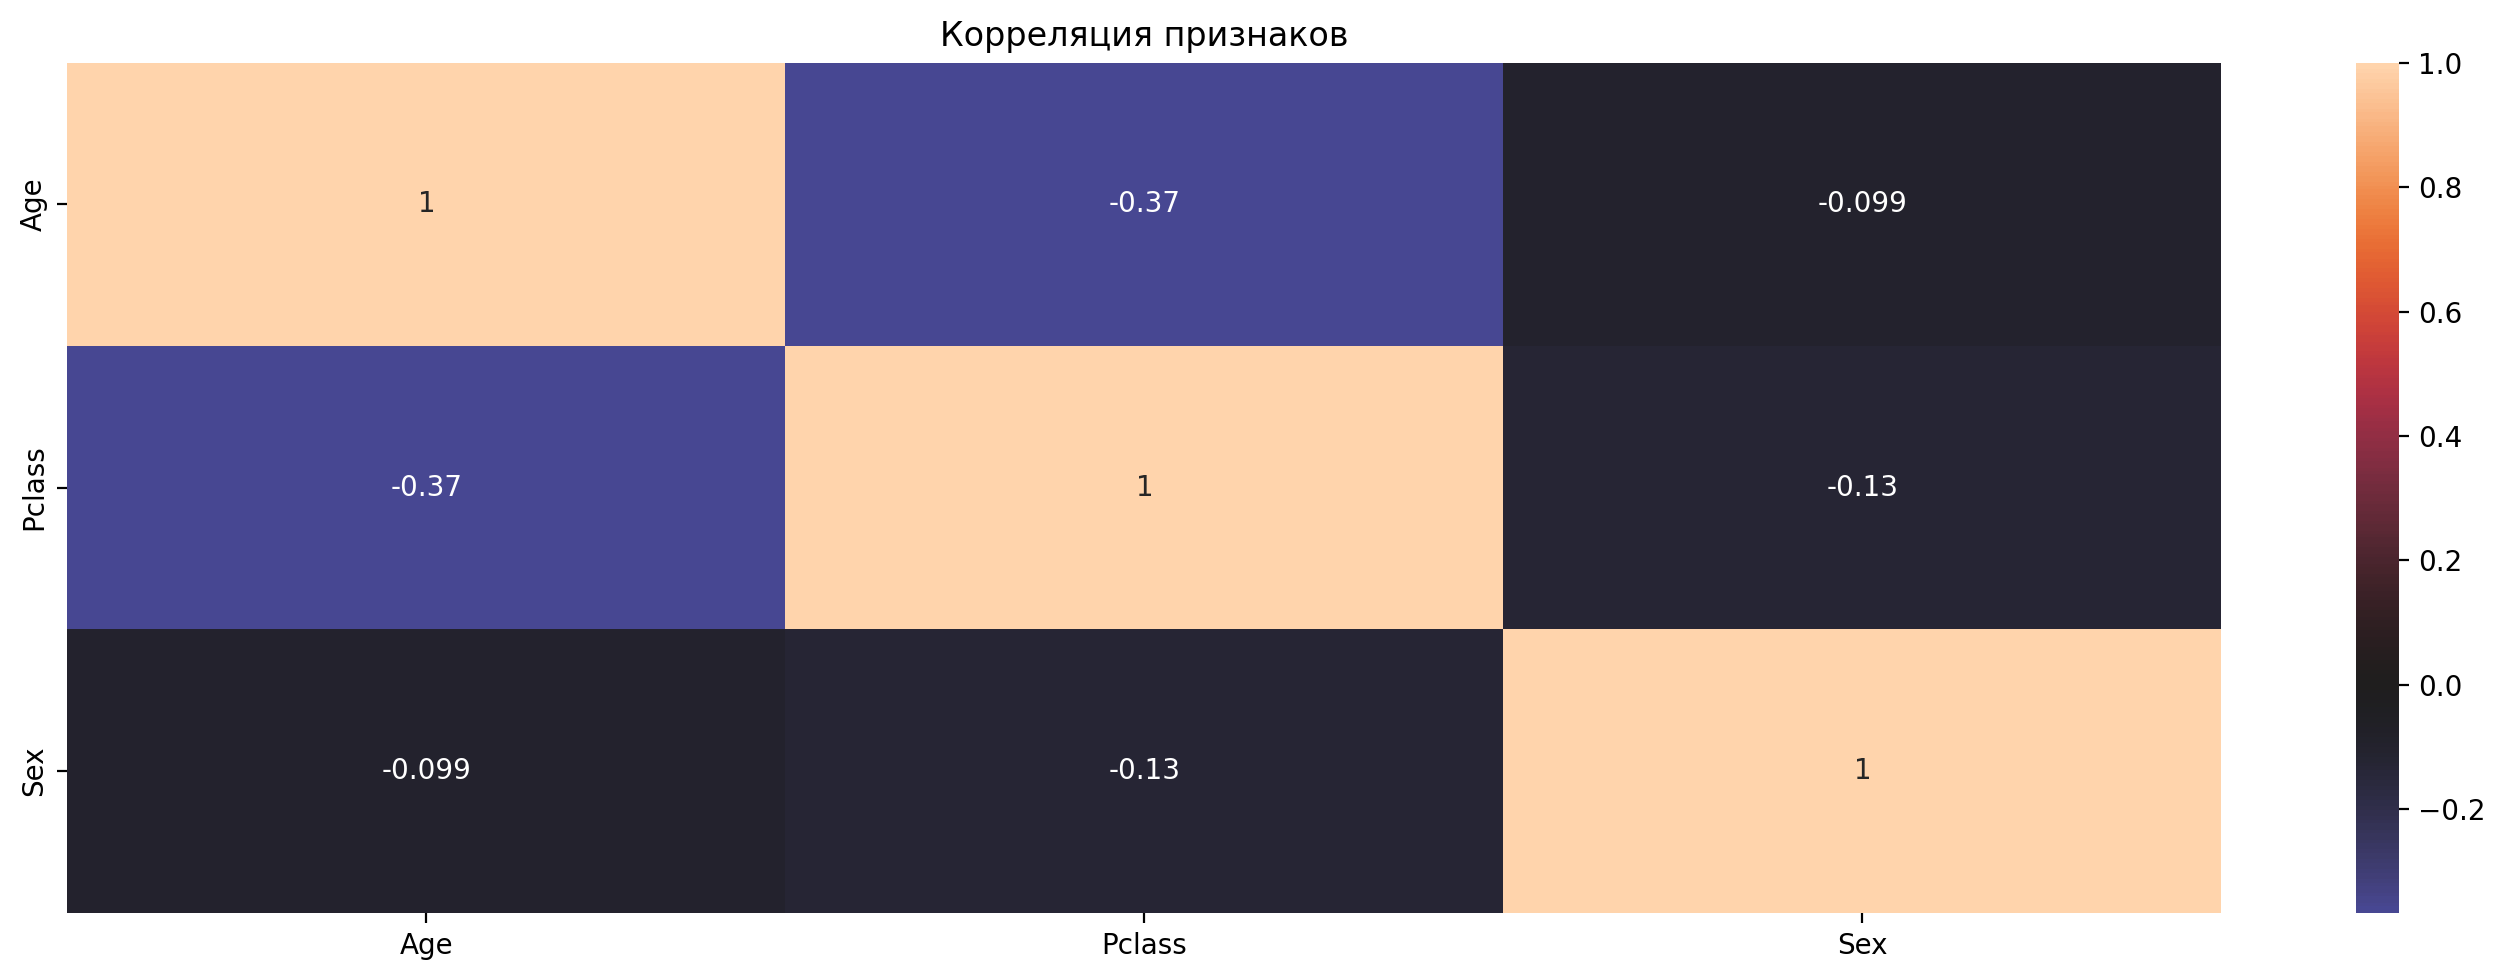

In [121]:
plt.figure(figsize=(14, 5), dpi=200)


features = ['Age', 'Pclass', 'Sex']
corr = df[features].corr()
sns.heatmap(corr, annot=True, center=0)
plt.title('Корреляция признаков')
plt.tight_layout()
plt.show()

In [122]:
df.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex
1       0      40.0
        1      35.0
2       0      30.0
        1      28.0
3       0      25.0
        1      21.5
Name: Age, dtype: float64

In [123]:
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [124]:
for col in df.columns:
    print(col, df[col].dtype,
          sep=(13 - len(col)) * ' ' + '|' + ' ' * 2)

PassengerId  |  int64
Survived     |  int64
Pclass       |  int64
Sex          |  int64
Age          |  float64
SibSp        |  int64
Parch        |  int64
Fare         |  float64
Embarked     |  object


#### Заполнил пропуски в столбце Age медианным значением, в зависимости от Pclass и Sex, так как с ним столбец кореллирует больше всего. А по остальным столбцам группировать пропуски я не могу, так как там слишком много уникальных значений. Теперь пропусков в данных нет. Осталось преобразовать категориальные столбцы в числовые, а точнее один столбец Embarked.

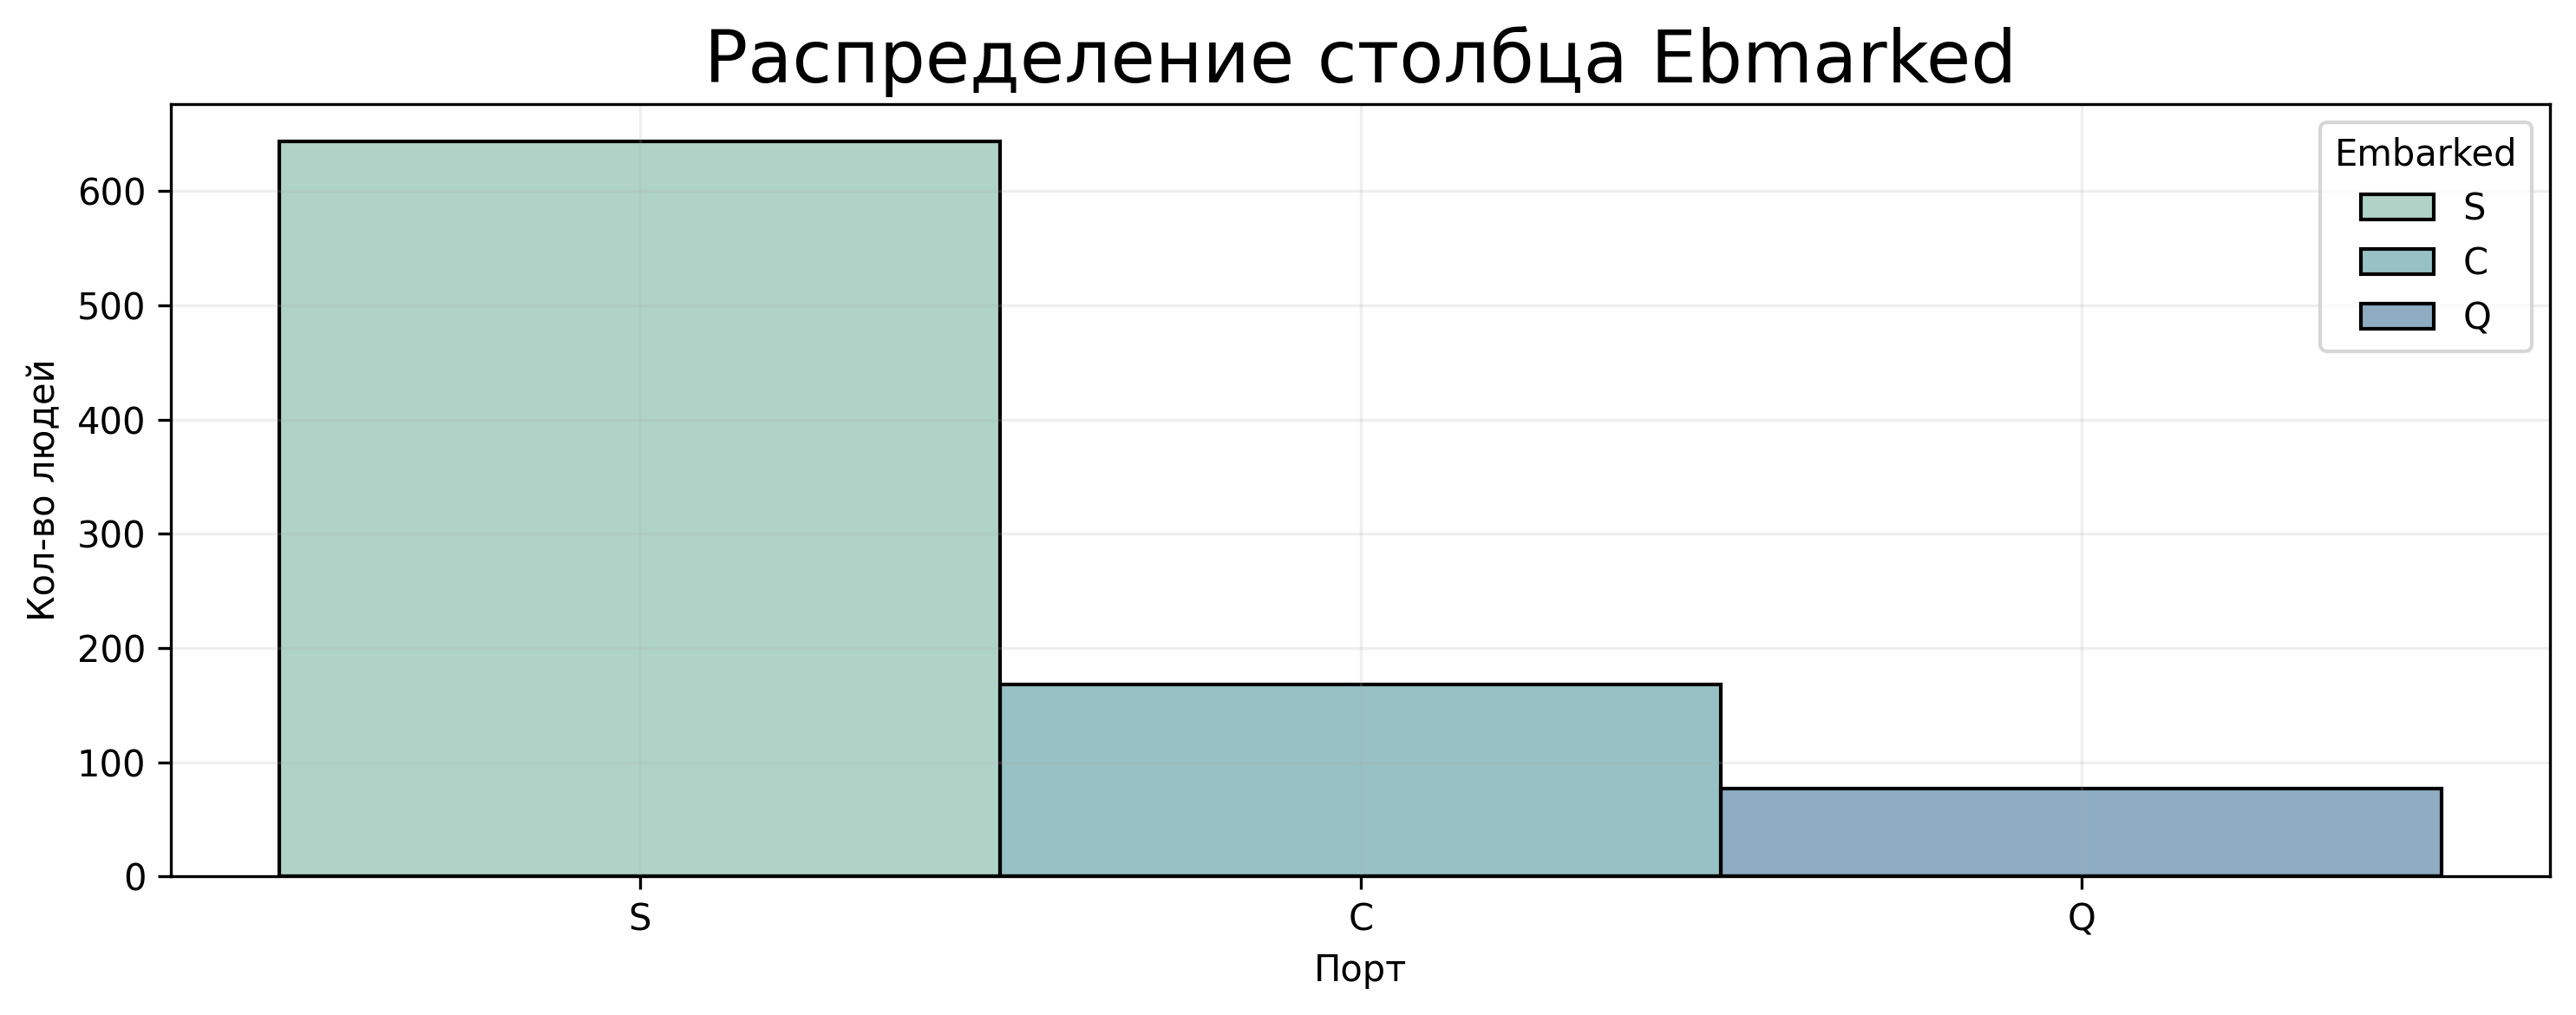

In [125]:
plt.figure(figsize=(10, 4), dpi=300)

sns.histplot(data=df, x='Embarked', hue='Embarked', bins=3, palette='crest')
plt.grid(True, alpha=0.2)
plt.xlabel('Порт')
plt.ylabel('Кол-во людей')

plt.title('Распределение столбца Ebmarked', fontsize=20)
plt.tight_layout()
plt.show()

In [126]:
df = pd.get_dummies(df, columns=['Embarked'], dtype=int)

In [127]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


#           Обучение модели

In [141]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression(random_state=7, max_iter=1000)

In [142]:
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_score = f1_score(y_train, y_train_pred)
test_score = f1_score(y_test, y_test_pred)

print(f'f1_score на train:  {train_score}')
print(f'f1_score на test:  {test_score}')

f1_score на train:  0.7514018691588785
f1_score на test:  0.7213114754098361
